In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas

In [17]:
np.__version__

'1.26.0b1'

In [27]:
matplotlib.__version__

'3.7.2'

In [6]:
pandas.__version__

'2.1.0'

In [25]:
df = pandas.read_csv("data/data.csv")
print(df.head(n=10)) 

    CaseNumber  LastName  PostCode   Age Sex ChestPainType  RestingBP  \
0  431-06-4243   Richard     99847  40.0   M           ATA        140   
1  415-39-7809  Sheppard     64192  49.0   F           NAP        160   
2  517-18-4618    Howard     29132  37.0   M           ATA        130   
3  634-33-8726    Taylor     12930  48.0   F           ASY        138   
4  151-40-1619   Mcgrath     79393  54.0   M           NAP        150   
5  339-61-9172     Blair     90152  39.0   M           NAP        120   
6  324-79-3351    Garcia     57408  45.0   F           ATA        130   
7  454-67-4268      Levy     63023  54.0   M           ATA        110   
8  015-12-6535     Brown     72420  37.0   M           ASY        140   
9  641-01-8087      Page     88077  48.0   F           ATA        120   

   Cholesterol  FastingBS  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  \
0          289          0           0    172              N      0.0       Up   
1          180          0         


Remove irrelevant columns (CaseNumber, LastName, PostCode) from the dataset 

In [9]:
df = df.drop(columns=["CaseNumber", "LastName", "PostCode"])
print(df.head(n=10)) 


    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  40.0   M           ATA        140          289          0           0   
1  49.0   F           NAP        160          180          0           0   
2  37.0   M           ATA        130          283          0           1   
3  48.0   F           ASY        138          214          0           0   
4  54.0   M           NAP        150          195          0           0   
5  39.0   M           NAP        120          339          0           0   
6  45.0   F           ATA        130          237          0           0   
7  54.0   M           ATA        110          208          0           0   
8  37.0   M           ASY        140          207          0           0   
9  48.0   F           ATA        120          284          0           0   

   MaxHR ExerciseAngina  Oldpeak ST_Slope HeartDisease  
0    172              N      0.0       Up            0  
1    156              N      1.0     Flat        

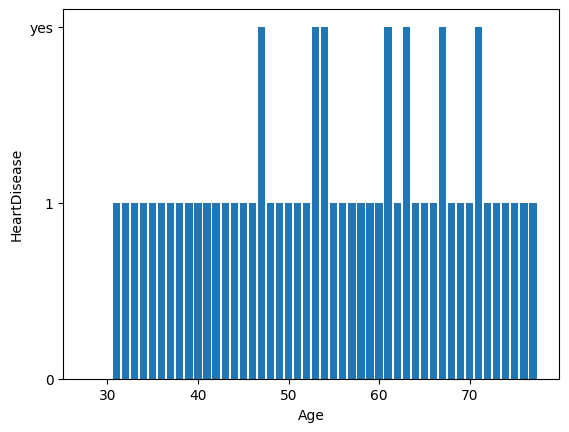

In [26]:
plt.bar(df["Age"], df["HeartDisease"])
plt.xlabel("Age")
plt.ylabel("HeartDisease")
plt.show()

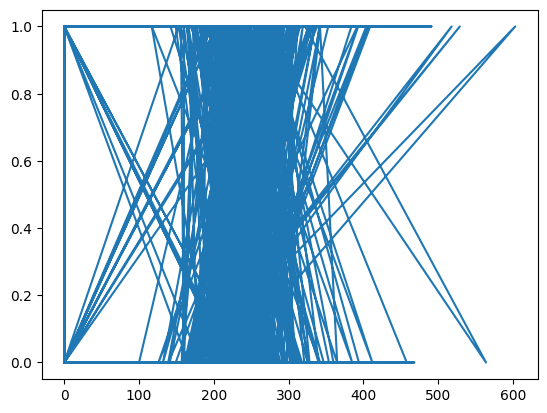

In [33]:
# cholestorol 

hearthDiseaseTrue = df["HeartDisease"].eq('1') 
plt.plot(df["Cholesterol"], hearthDiseaseTrue)  # Plot the chart
plt.show()  # display